# Table of Contents
 <p><div class="lev1 toc-item"><a href="#1.--What-is-a-neural-network?" data-toc-modified-id="1.--What-is-a-neural-network?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1.  What is a neural network?</a></div><div class="lev1 toc-item"><a href="#2.-A-neural-network-with-no-hidden-layers" data-toc-modified-id="2.-A-neural-network-with-no-hidden-layers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. A neural network with no hidden layers</a></div><div class="lev1 toc-item"><a href="#3.-Now-with-an-NN" data-toc-modified-id="3.-Now-with-an-NN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Now with an NN</a></div><div class="lev1 toc-item"><a href="#MNIST" data-toc-modified-id="MNIST-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MNIST</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1.  What is a neural network?

$$ F(\mathbf x ; W, b) = (F_L \circ \cdots \circ F_1)(\mathbf x) $$
where layer $\ell -1$ is connected to layer $\ell$ by a function $F_\ell$ of the form 
$$ F_\ell (a^\ell ; W^\ell b^\ell) = \sigma(W^\ell a^\ell + b^\ell)$$
and $W^\ell$ is the weight matrix at layer $\ell$ having size $n_\ell \times n_{\ell -1}$.

Method for choosing the weights and the biases: SGD and Backprop

# 2. A neural network with no hidden layers

This is just logistic regression.

Make some fake data.

In [7]:
N = 1000
blue_X = np.random.rand(N,2) @ np.array([[1,1],[-1,1]]) + np.array([1,1]).reshape(1,2)
red_X = np.random.rand(N,2) @ np.array([[1,1],[-1,1]]) + np.array([2,2]).reshape(1,2)

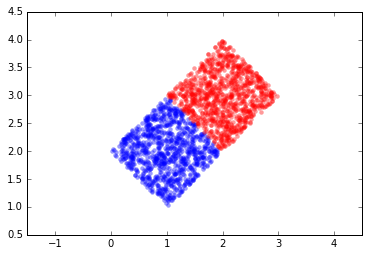

In [15]:
plt.scatter(blue_X[:,0], blue_X[:,1], c='b', lw=0, alpha=.4)
plt.scatter(red_X[:,0], red_X[:,1], c='r', lw=0, alpha=.4)
plt.axis('equal');

In [9]:
X = np.vstack([blue_X, red_X])
y = np.concatenate([np.zeros(N), np.ones(N)]) # blue = 0; red = 1

In [10]:
from sklearn.linear_model import LogisticRegression as LR

In [11]:
reg = LR()

In [12]:
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
X_test = np.array([[a,b] for a in np.linspace(0,3,50) for b in np.linspace(1,4,50)])

In [19]:
y_test = reg.predict(X_test)

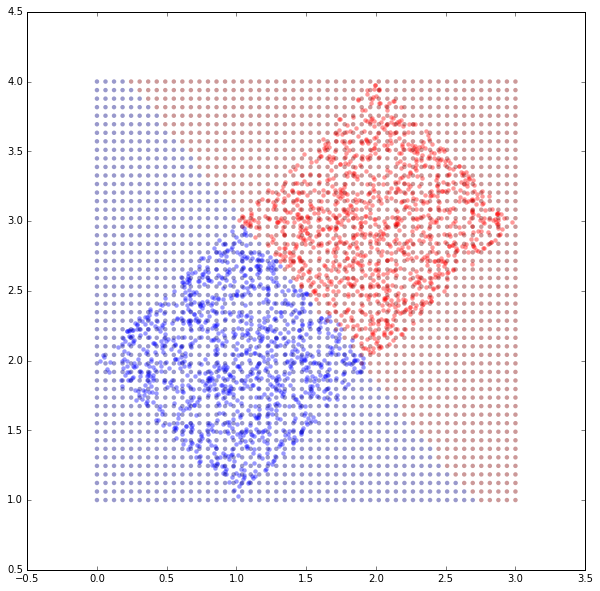

In [25]:
plt.figure(figsize=(10,10))
# Training Data
plt.scatter(blue_X[:,0], blue_X[:,1], c='b', lw=0, alpha=.4)
plt.scatter(red_X[:,0], red_X[:,1], c='r', lw=0, alpha=.4)
# Testing data
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, lw=0, alpha=.4)
# Formatting
plt.axis('equal');

In [26]:
reg.coef_ # is our weight matrix W

array([[ 3.9784018 ,  3.27197668]])

In [27]:
reg.intercept_ # is our bias b

array([-14.00284153])

# 3. Now with an NN

So let's do the same thing, but now use a neural network object from `sklearn`.

In [28]:
from sklearn.neural_network import MLPClassifier as mlp

In [49]:
nn = mlp(hidden_layer_sizes=(1,), activation='logistic', max_iter=1000, alpha=.2)

In [50]:
nn.fit(X,y)

MLPClassifier(activation='logistic', alpha=0.2, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [51]:
y_nn_test = nn.predict(X_test)

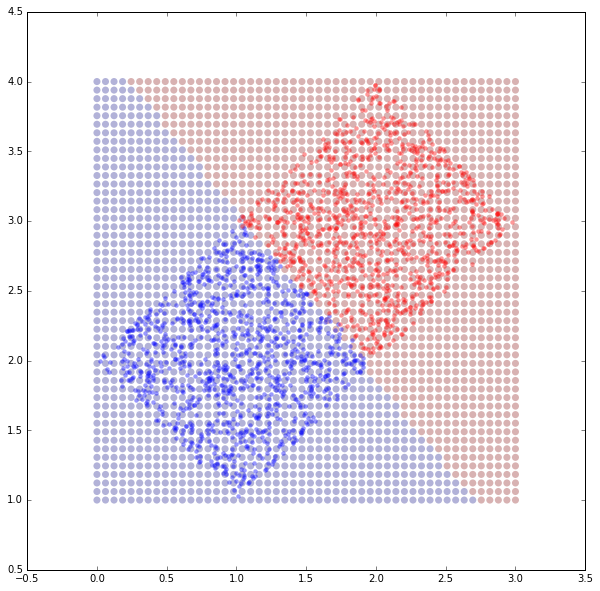

In [52]:
plt.figure(figsize=(10,10))
# Testing data
plt.scatter(X_test[:,0], X_test[:,1], c=y_nn_test, alpha=.3, s=50, lw=0)
# Training Data
plt.scatter(blue_X[:,0], blue_X[:,1], c='b', lw=0, alpha=.4)
plt.scatter(red_X[:,0], red_X[:,1], c='r', lw=0, alpha=.4)
# Formatting
plt.axis('equal');

In [53]:
nn.coefs_

[array([[ 2.23367211],
        [ 1.83933749]]), array([[ 8.14071762]])]

In [64]:
xx, yy = np.meshgrid(np.linspace(0,3,50), np.linspace(1,4,50))
Z = reg.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

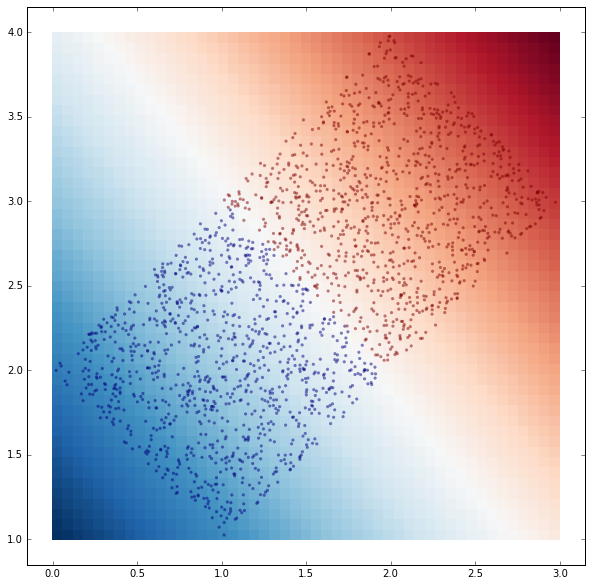

In [65]:
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
plt.scatter(X[:,0], X[:,1], c=y, s=10, alpha=.5, lw=0)
plt.axis('tight');

# MNIST

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [66]:
from sklearn.model_selection import train_test_split as tts

In [100]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=.2)
nn_digits = mlp(hidden_layer_sizes=(18,10), activation='relu')

In [101]:
nn_digits.fit(X_train, y_train)

/Users/berkas/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(18, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [102]:
nn_digits.score(X_test, y_test)

0.95833333333333337

Let's compare that score against the score for a $k$-nearest neighbours classifier.

In [72]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [73]:
knn_clf = knn()

In [74]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
knn_clf.score(X_test, y_test)

0.98611111111111116

So KNN actually performs much better. But we don't really know what we're doing with the NN so how can we fix that to make it better? 